## **Introduction**

## **Theory**

### Empirical Risk Minimization (ERM)

#### Empirical Risk vs. Expected Risk
En el contexto de ML, el objetivo *es encontrar un modelo que minimice la pérdida en los datos de prueba* y no solo en los datos de entrenamiento. Para formalizar esta idea, se definen dos conceptos clave:

- **Expected Risk (Riesgo Esperado):** Es la pérdida promedio que el modelo tendría sobre toda la distribución de datos. Se define como:
  
   $$R(f) = \mathbb{E}[\ell(y, f(x))] = \int \ell(y, f(x)) p(x, y) dx dy$$
  
  Como la distribución real de los datos  $p(x, y)$  no es conocida, no podemos calcular este riesgo directamente.

- **Empirical Risk (Riesgo Empírico):** Es la estimación del riesgo esperado usando un conjunto finito de datos de entrenamiento $\{(x_n, y_n)\}_{n=1}^{N}$:
  
  $$R_{emp}(f) = \frac{1}{N} \sum_{n=1}^{N} \ell(y_n, f(x_n))$$
  
  El **Empirical Risk Minimization (ERM)** consiste en minimizar este riesgo empírico para encontrar los parámetros óptimos del modelo.

#### Necesidad de un Test Set
Minimizar el riesgo empírico puede llevar a un modelo que se desempeña bien en los datos de entrenamiento pero no generaliza a nuevos datos. Para evaluar la capacidad del modelo de generalizar, se dividen los datos en:

- **Training Set (Conjunto de Entrenamiento):** Se usa para ajustar los parámetros del modelo.
- **Validation Set (Conjunto de Validación):** Se usa para ajustar hiperparámetros y evitar sobreajuste (*overfitting*).
- **Test Set (Conjunto de Prueba):** Se usa solo al final para evaluar la generalización del modelo en datos no vistos.

#### Regularización: Evitar el Sobreajuste
Cuando un modelo es demasiado complejo, puede aprender no solo los patrones de los datos de entrenamiento, sino también el ruido. Para evitar este sobreajuste, se emplea **regularización**, que penaliza la complejidad del modelo.

Algunas técnicas comunes son:

- **Regularización L2 (Ridge Regression):** Agrega un término de penalización sobre la magnitud de los parámetros:
  
$$  R_{reg}(f) = \frac{1}{N} \sum_{n=1}^{N} \ell(y_n, f(x_n)) + \lambda \|\theta\|^2 $$  
  Donde $\lambda$ controla la cantidad de regularización.

- **Regularización L1 (Lasso Regression):** Similar a la regularización L2, pero en lugar de penalizar la norma cuadrática, penaliza la norma absoluta de los parámetros.

#### Cross-Validation: Evaluación del Modelo
La validación cruzada es una técnica utilizada para evaluar el rendimiento de un modelo sin desperdiciar datos en un único conjunto de validación.

- **K-Fold Cross-Validation:**
  - Se divide el conjunto de datos en $K$ partes.
  - Se entrena el modelo $K$ veces, usando $K-1$ partes para entrenar y una para validar.
  - Se promedian los resultados para obtener una mejor estimación del rendimiento del modelo.

Esta técnica ayuda a seleccionar el mejor modelo e hiperparámetros sin riesgo de sobreajustar a un conjunto de validación específico.

### Ejemplo de emprical risk (usando MSE) vs expected risk
#### MSE: Mean Squared Error

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **EDA**

In [2]:
from sklearn.datasets import fetch_california_housing

In [12]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedHouseVal')

# Alternative form: 
# X, y = fetch_california_housing(return_X_y=True)

#### Perform EDA

In [13]:
X.head

<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Lo

In [14]:
y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

## **Models**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Train/Test Split and Baseline Model

# 1. Dividimos en train y temporal datasets (proportion = [0.6, 0.4])
X_train, X_temp, y_train, y_temp = train_test_split(X, y,
                                                    test_size=0.4,  # temp_size = 0.4 -> train_size = 0.6
                                                    random_state=42
                                                    )

# 2. Subdividimos temp en validation y test (proportion = 0.5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#### Linear Model

In [19]:
#  Train a linear regression model

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)

print(f"Validation MSE: {mse:.4f}")

Validation MSE: 0.5326


#### Polynomial Regression and Overfitting

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
# Create a polynomial feature

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

In [24]:
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_val_poly)
mse_poly = mean_squared_error(y_val, y_pred_poly)
print(f"Degree 3 MSE: {mse_poly:.4f}")

Degree 3 MSE: 13.7254


## **Analysis**

In [29]:
# Compute empirical risk (using MSE) for all models on the test set

# Linear model
y_pred_test_lin = model.predict(X_test)
test_mse_lin = mean_squared_error(y_test, y_pred_test_lin)


# Polynomial model
X_test_poly = poly.transform(X_test)
y_pred_test_poly = model_poly.predict(X_test_poly)
test_mse_poly = mean_squared_error(y_test, y_pred_poly)

print(f"Test MSE:\nLinear = {test_mse_lin:.4f}\nDegre 3 = {test_mse_poly:.4f}")

Test MSE:
Linear = 0.5546
Degre 3 = 15.9663


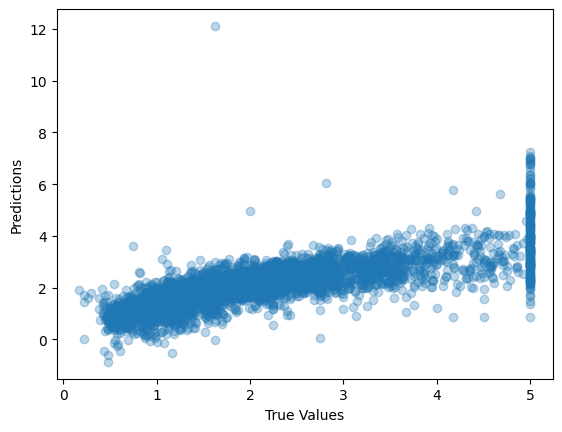

In [32]:
# Visualization

plt.scatter(y_test, y_pred_test_lin, alpha=0.3)
# plt.scatter(y_test, y_pred_test_poly, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
# plt.plot([0, 5], [0, 5], 'r--')  # Perfect prediction line
plt.show()

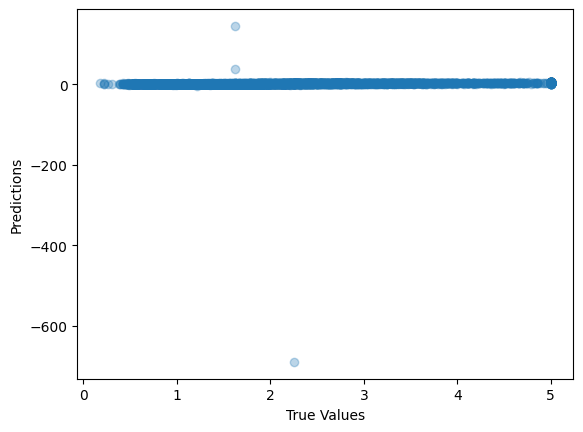

In [33]:
plt.scatter(y_test, y_pred_test_poly, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
# plt.plot([0, 5], [0, 5], 'r--')  # Perfect prediction line
plt.show()